# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
302,5,77,82,41,42,35.8,0.156,35,0
155,7,152,88,44,0,50.0,0.337,36,1
338,9,152,78,34,171,34.2,0.893,33,1
37,9,102,76,37,0,32.9,0.665,46,1
198,4,109,64,44,99,34.8,0.905,26,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 17ms/step - loss: 0.7943 - accuracy: 0.4028 - val_loss: 0.8041 - val_accuracy: 0.3750
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7750 - accuracy: 0.4271 - val_loss: 0.7853 - val_accuracy: 0.4219
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7581 - accuracy: 0.4497 - val_loss: 0.7685 - val_accuracy: 0.4740
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7430 - accuracy: 0.4688 - val_loss: 0.7537 - val_accuracy: 0.5000
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7296 - accuracy: 0.5000 - val_loss: 0.7404 - val_accuracy: 0.5312
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7175 - accuracy: 0.5330 - val_loss: 0.7285 - val_accuracy: 0.5573
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7066 - accuracy: 0.5729 - val_loss: 0.7175 - val_accuracy: 0.5729
Epoch 8/200


In [29]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [30]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
y_pred_prob_nn_1[:10]

array([[0.5075299 ],
       [0.6375461 ],
       [0.36841184],
       [0.34056687],
       [0.16937986],
       [0.53804725],
       [0.02701562],
       [0.34221086],
       [0.8905823 ],
       [0.19080865]], dtype=float32)

Create the plot_roc function

In [32]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.819


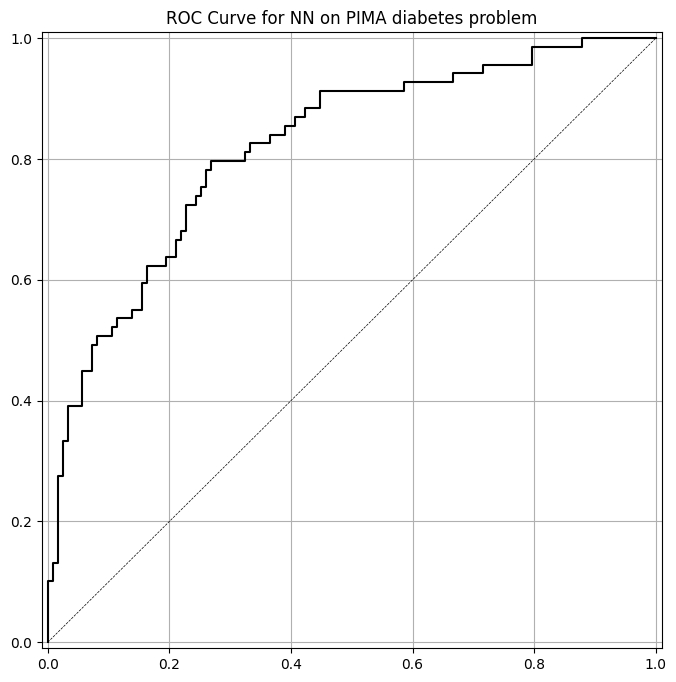

In [33]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [34]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

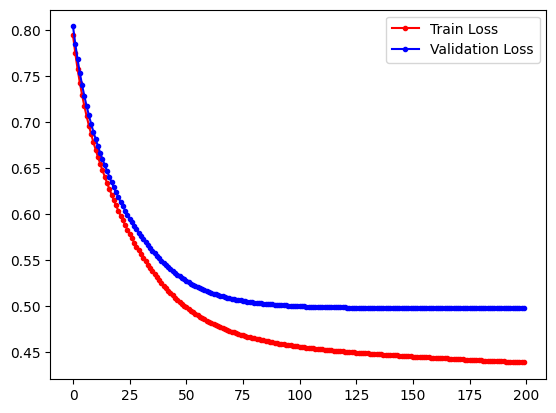

In [35]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

Answer: Since the training and validation loss is rapidly decreasing starting from 25-75 epochs, this means that the accuracy of the model is also becoming high over time.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 22ms/step - loss: 0.7959 - accuracy: 0.4167 - val_loss: 0.7582 - val_accuracy: 0.4635
Epoch 2/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.7626 - accuracy: 0.4670 - val_loss: 0.7326 - val_accuracy: 0.5052
Epoch 3/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.7388 - accuracy: 0.5017 - val_loss: 0.7138 - val_accuracy: 0.5312
Epoch 4/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7218 - accuracy: 0.5122 - val_loss: 0.6999 - val_accuracy: 0.5521
Epoch 5/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.7089 - accuracy: 0.5260 - val_loss: 0.6893 - val_accuracy: 0.5625
Epoch 6/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.6986 - accuracy: 0.5486 - val_loss: 0.6809 - val_accuracy: 0.5885
Epoch 7/1500
18/18 [==============================] - 0s 10ms/step - loss: 0.6904 - accuracy: 0.5816 - val_loss: 0.6743 - val_accuracy: 0.5990
Epoc

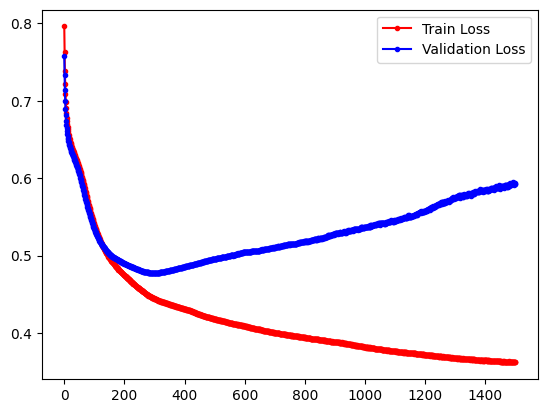

In [44]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

6/6 [==============================] - 0s 2ms/step
accuracy is 0.641
roc-auc is 0.785


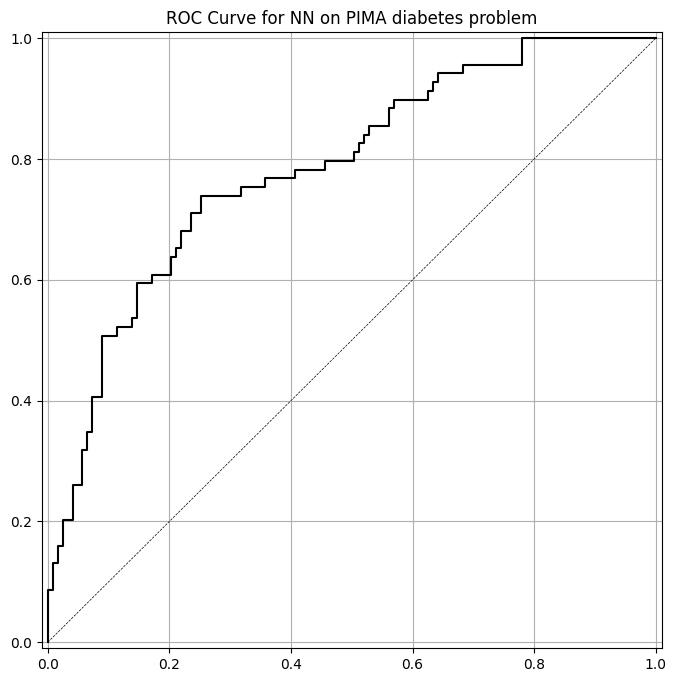

In [43]:
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

different learning rates and epochs

In [45]:
model.compile(SGD(lr = .000001), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10)

Epoch 1/10
18/18 [==============================] - 1s 13ms/step - loss: 0.3621 - accuracy: 0.8351 - val_loss: 0.5920 - val_accuracy: 0.7448
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.3620 - accuracy: 0.8333 - val_loss: 0.5932 - val_accuracy: 0.7500
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.3623 - accuracy: 0.8351 - val_loss: 0.5952 - val_accuracy: 0.7448
Epoch 4/10
18/18 [==============================] - 0s 11ms/step - loss: 0.3616 - accuracy: 0.8333 - val_loss: 0.5950 - val_accuracy: 0.7500
Epoch 5/10
18/18 [==============================] - 0s 11ms/step - loss: 0.3617 - accuracy: 0.8351 - val_loss: 0.5952 - val_accuracy: 0.7448
Epoch 6/10
18/18 [==============================] - 0s 10ms/step - loss: 0.3624 - accuracy: 0.8264 - val_loss: 0.5939 - val_accuracy: 0.7500
Epoch 7/10
18/18 [==============================] - 0s 12ms/step - loss: 0.3616 - accuracy: 0.8351 - val_loss: 0.5922 - val_accuracy: 0.7448
Epoch 8/10
18/1

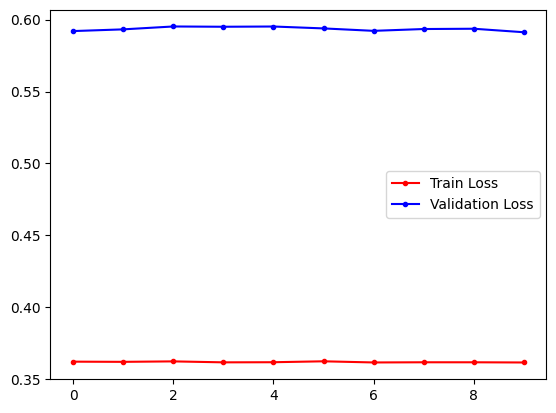

In [48]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

6/6 [==============================] - 0s 3ms/step
accuracy is 0.641
roc-auc is 0.784


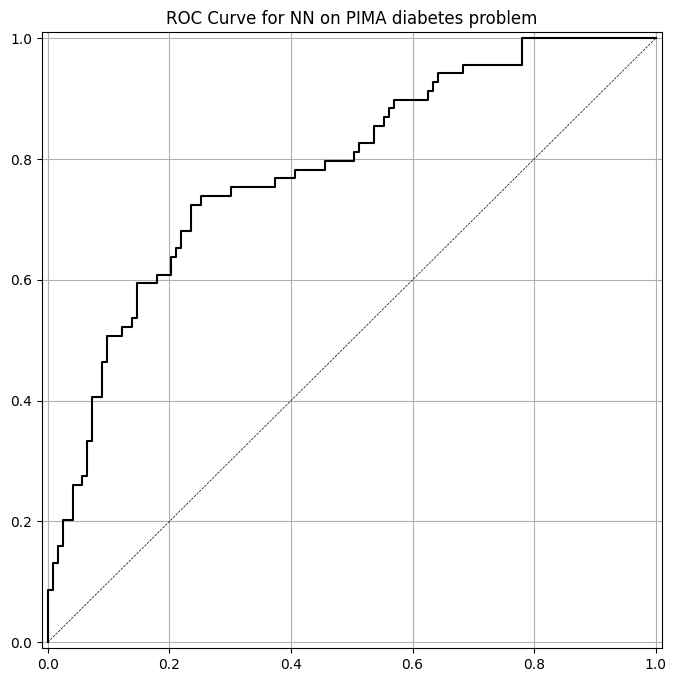

In [47]:
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

From the results, I have observed that as we decrease epochs, the accuracy of the model also declines. The same goes with the learning rate, decreasing the learning rate could also affect the accuracy of the model.

#### Conclusion

#type your answer here

This laboratory activity introduced us on how to train neural networks. We were tasked to demonstrate how to build and train neural networks and how to evaluate and plot the model using training and validation loss. In conclusion, this activity have helped me understand how to train neural networks and further grasp how to evaluate and plot training and validation loss.